In [1]:
from luxai_s2.env import LuxAI_S2
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from gym import spaces
# from kits.python.lux.kit import obs_to_game_state, GameState

/home/pts/projects/rl/Lux-Design-S2/env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env = LuxAI_S2() # create the environment object
obs = env.reset(seed=41) # resets an environment with a seed

In [3]:
# print(env.__dict__)

In [4]:
# the observation is always composed of observations for both players.
obs.keys(), obs["player_0"].keys()

(dict_keys(['player_0', 'player_1']),
 dict_keys(['units', 'teams', 'factories', 'board', 'real_env_steps', 'global_id']))

In [5]:
print(obs['player_0'])

{'units': {'player_0': {}, 'player_1': {}}, 'teams': {}, 'factories': {'player_0': {}, 'player_1': {}}, 'board': {'rubble': array([[78, 74, 71, ..., 74, 77, 79],
       [78, 74, 71, ..., 72, 75, 77],
       [77, 74, 71, ..., 70, 73, 76],
       ...,
       [77, 74, 71, ..., 70, 73, 76],
       [78, 74, 71, ..., 72, 75, 77],
       [78, 74, 71, ..., 74, 77, 79]]), 'ore': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'ice': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'lichen': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0

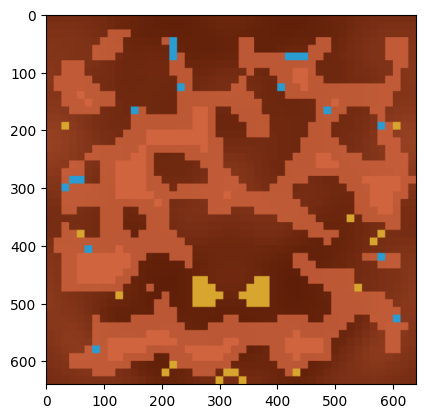

In [6]:
def render():
    img = env.render("rgb_array", width=640, height=640)
    plt.imshow(img)

render()

# Start game

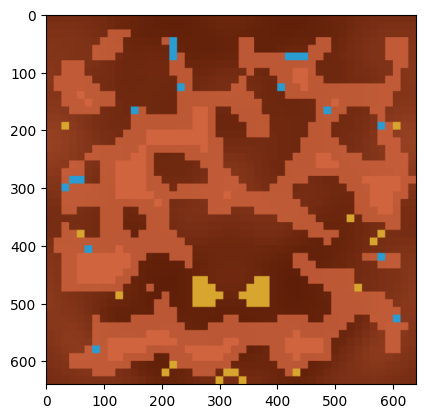

In [7]:
env = LuxAI_S2() # create the environment object
obs = env.reset(seed=41) # resets an environment with a seed

render()

# Phase 1: Bidding

In [8]:
pprint(obs['player_1']['teams'])
pprint(obs['player_0']['teams'])

{}
{}


In [9]:
print(env.action_space('player_0'))
print(env.action_space('player_1'))

Dict(bid:Discrete(100000), faction:<luxai_s2.spaces.act_space.FactionString object at 0x7f5449d302b0>)
Dict(bid:Discrete(100000), faction:<luxai_s2.spaces.act_space.FactionString object at 0x7f5449d32bc0>)


In [10]:
obs, rewards, dones, infos = env.step({
    'player_0': dict(faction="AlphaStrike", bid=10),
    'player_1': dict(faction="AlphaStrike", bid=12),
})
print({'rewards': rewards, 'dones': dones, 'infos': infos})
pprint(obs['player_0'])

{'rewards': {'player_0': 0, 'player_1': 0}, 'dones': {'player_0': False, 'player_1': False}, 'infos': {'player_0': {}, 'player_1': {}}}
{'board': {'factories_per_team': 2,
           'ice': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]),
           'lichen': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]),
           'lichen_strains': array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]]),
           'ore': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0,

# Stage 2: Spawning factories

In [11]:
print(env.action_space('player_0'))
print(env.action_space('player_1'))

Dict(metal:Discrete(100000), spawn:Box([0 0], [48 48], (2,), int64), water:Discrete(100000))
Dict(metal:Discrete(100000), spawn:Box([0 0], [48 48], (2,), int64), water:Discrete(100000))


In [12]:
print(obs['player_0']['teams'])

{'player_0': {'team_id': 0, 'faction': 'AlphaStrike', 'water': 300, 'metal': 300, 'factories_to_place': 2, 'factory_strains': [], 'place_first': False, 'bid': 10}, 'player_1': {'team_id': 1, 'faction': 'AlphaStrike', 'water': 288, 'metal': 288, 'factories_to_place': 2, 'factory_strains': [], 'place_first': True, 'bid': 12}}


In [13]:
obs, rewards, dones, infos = env.step({
    # 'player_0': dict(metal=222, water=123, spawn=[15,15]),
    'player_1': dict(metal=212, water=163, spawn=[3,3]),
})
print({'rewards': rewards, 'dones': dones, 'infos': infos})
pprint(obs['player_0'])

{'rewards': {'player_0': 0, 'player_1': 0}, 'dones': {'player_0': False, 'player_1': False}, 'infos': {'player_0': {}, 'player_1': {}}}
{'board': {'factories_per_team': 2,
           'ice': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]),
           'lichen': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]),
           'lichen_strains': array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]]),
           'ore': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0,

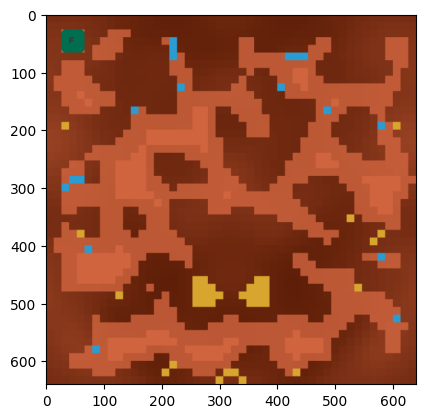

In [14]:
render()

In [15]:
pprint(obs['player_0']['board']['valid_spawns_mask'][15,15])

True


In [16]:
obs, rewards, dones, infos = env.step({
    'player_0': dict(metal=222, water=123, spawn=[15,15]),
    # 'player_1': dict(metal=212, water=163, spawn=[3,3]),
})
print({'rewards': rewards, 'dones': dones, 'infos': infos})
pprint(obs['player_0'])

{'rewards': {'player_0': 0, 'player_1': 0}, 'dones': {'player_0': False, 'player_1': False}, 'infos': {'player_0': {}, 'player_1': {}}}
{'board': {'factories_per_team': 2,
           'ice': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]),
           'lichen': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]),
           'lichen_strains': array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]]),
           'ore': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0,

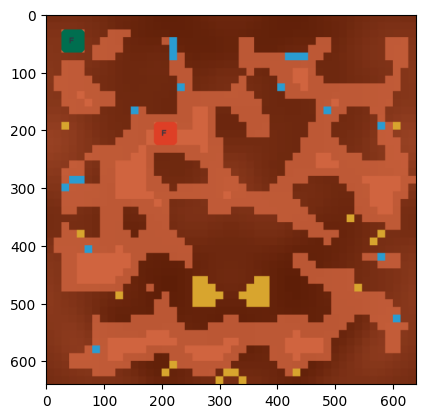

In [17]:
render()

In [18]:
pprint(obs['player_0']['board']['valid_spawns_mask'][25,25])

True


In [19]:
obs, rewards, dones, infos = env.step({
    'player_1': dict(metal=212, water=163, spawn=[25,25]),
})
print({'rewards': rewards, 'dones': dones, 'infos': infos})
pprint(obs['player_0'])

{'rewards': {'player_0': 0, 'player_1': 0}, 'dones': {'player_0': False, 'player_1': False}, 'infos': {'player_0': {}, 'player_1': {}}}
{'board': {'factories_per_team': 2,
           'ice': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]),
           'lichen': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]),
           'lichen_strains': array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]]),
           'ore': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0,

In [20]:
pprint(obs['player_0']['board']['valid_spawns_mask'][20,20])

True


In [21]:
obs, rewards, dones, infos = env.step({
    'player_0': dict(metal=212, water=163, spawn=[20,20]),
})
print({'rewards': rewards, 'dones': dones, 'infos': infos})
pprint(obs['player_0'])

{'rewards': {'player_0': 0, 'player_1': 0}, 'dones': {'player_0': False, 'player_1': False}, 'infos': {'player_0': {}, 'player_1': {}}}
{'board': {'factories_per_team': 2,
           'ice': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]),
           'lichen': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]),
           'lichen_strains': array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]]),
           'ore': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0,

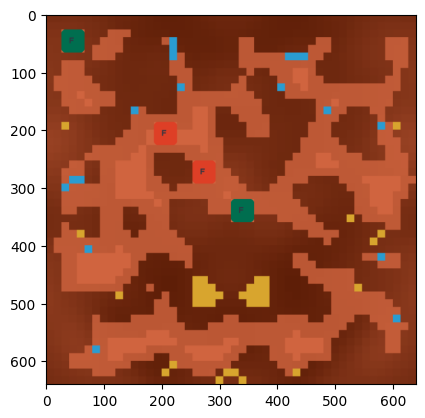

In [22]:
render()

In [23]:
print(env.action_space('player_0'))
print(env.action_space('player_1'))

Dict(factory_1:Discrete(3), factory_3:Discrete(3))
Dict(factory_0:Discrete(3), factory_2:Discrete(3))


In [24]:
obs['player_0']['real_env_steps']

0

In [25]:
print(env.action_space('player_0'))
print(env.action_space('player_1'))

Dict(factory_1:Discrete(3), factory_3:Discrete(3))
Dict(factory_0:Discrete(3), factory_2:Discrete(3))


In [26]:
obs, rewards, dones, infos = env.step({
    'player_0': {'factory_1': 0}, # Light robot
    # 'player_1': {'factory_0': 0}, # Heavy robot
})
print({'rewards': rewards, 'dones': dones, 'infos': infos})
pprint(obs['player_0'])

{'rewards': {'player_0': 0, 'player_1': 0}, 'dones': {'player_0': False, 'player_1': False}, 'infos': {'player_0': {}, 'player_1': {}}}
{'board': {'factories_per_team': 2,
           'ice': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]),
           'lichen': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]),
           'lichen_strains': array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]]),
           'ore': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0,

In [27]:
print(env.action_space('player_0'))
print(env.action_space('player_1'))

Dict(factory_1:Discrete(3), factory_3:Discrete(3), unit_4:<luxai_s2.spaces.act_space.ActionsQueue object at 0x7f5449b64430>)
Dict(factory_0:Discrete(3), factory_2:Discrete(3))


In [28]:
obs, rewards, dones, infos = env.step({
    'player_0': {'factory_1': 0}, # Light robot
    # 'player_1': {'factory_0': 0}, # Heavy robot
})
print({'rewards': rewards, 'dones': dones, 'infos': infos})
pprint(obs['player_0'])

{'rewards': {'player_0': 0, 'player_1': 0}, 'dones': {'player_0': False, 'player_1': False}, 'infos': {'player_0': {}, 'player_1': {}}}
{'board': {'factories_per_team': 2,
           'ice': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]),
           'lichen': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]),
           'lichen_strains': array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]]),
           'ore': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0,